In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as hr
import dionysus as d
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from src.tda import ClutchMapper, visualize_complex
from src.data_pipeline import query_avg
import plotly.plotly as py

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)

plt.style.use('ggplot')

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

In [30]:
df = query_avg("HAVING position = 'RB'")

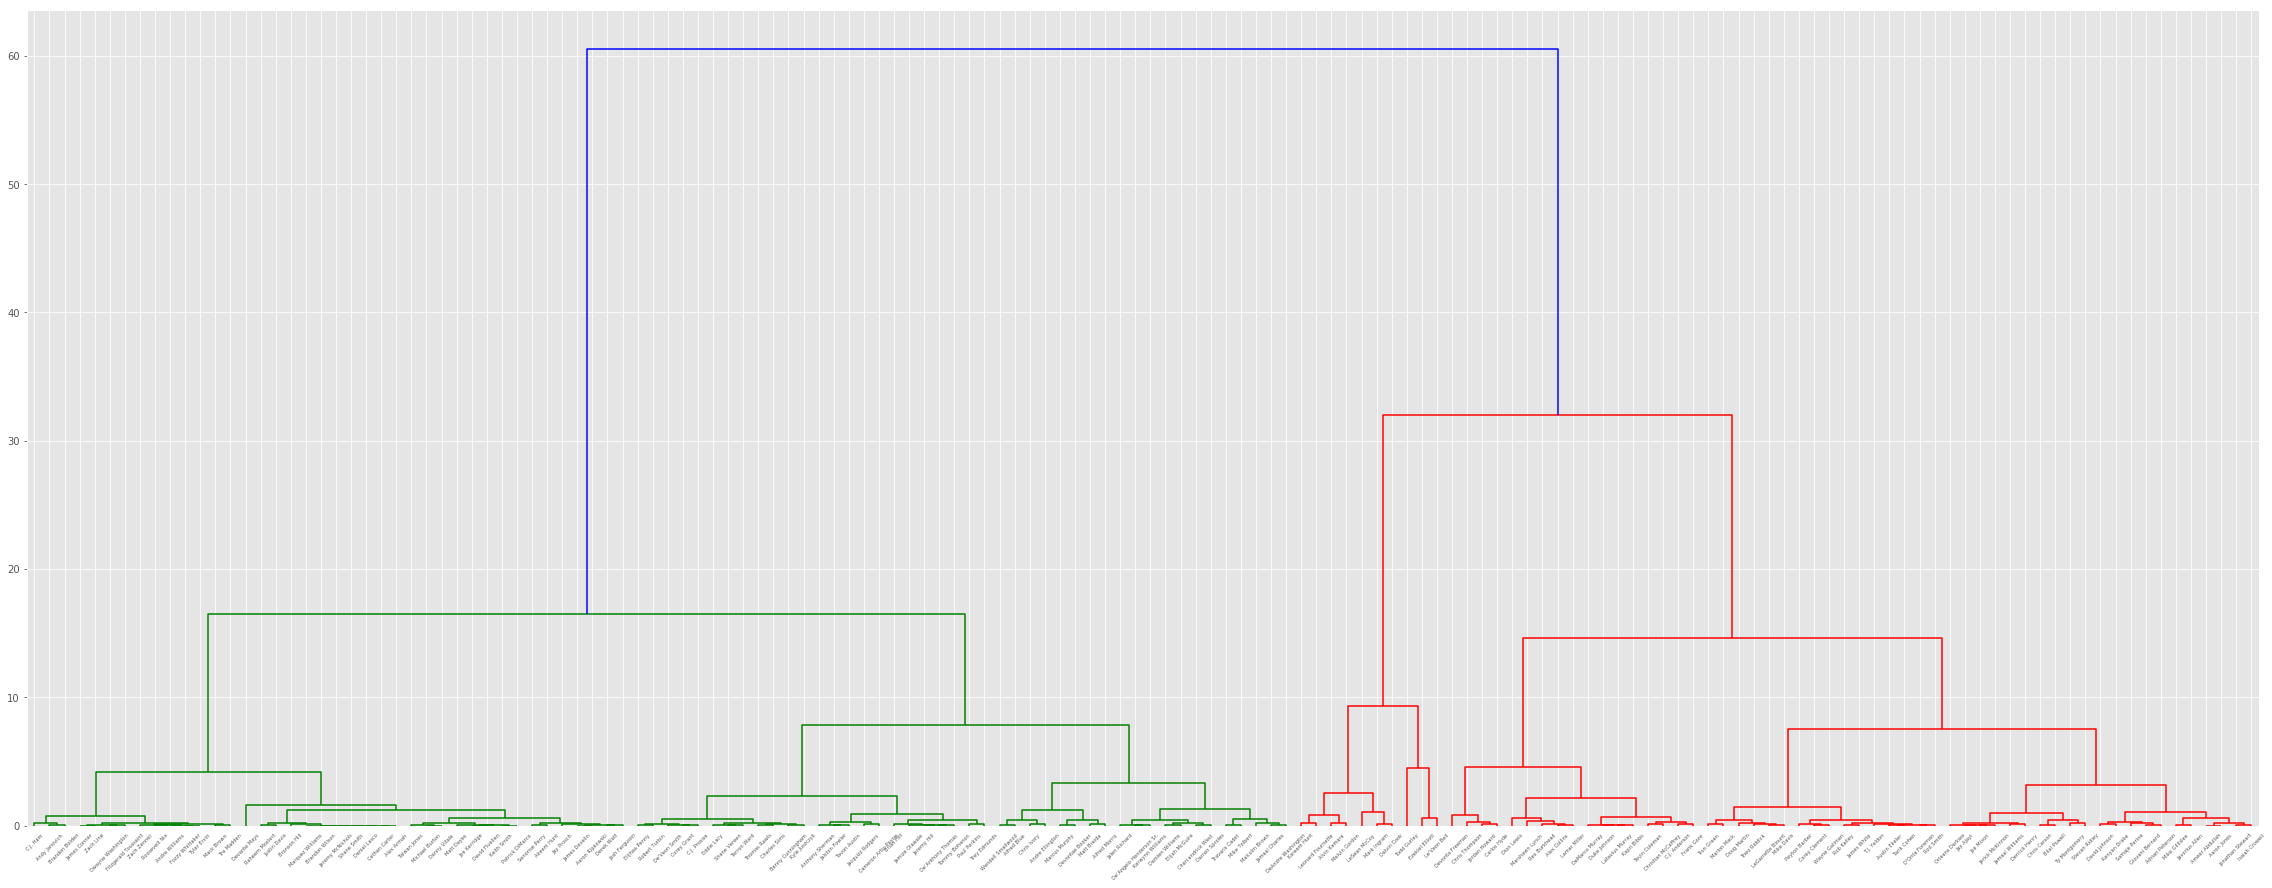

In [31]:
X = df['avg_points'].values.reshape(-1,1)
dist_vector = pdist(X, metric='euclidean')
linkage_mat = hr.linkage(dist_vector, method='ward')
plt.figure(figsize=(40,15));
dendrogram = hr.dendrogram(linkage_mat, labels=df['name'].values);
plt.xticks(rotation=45);
plt.savefig('../plots/dendrogram_ward_linkage_wr')

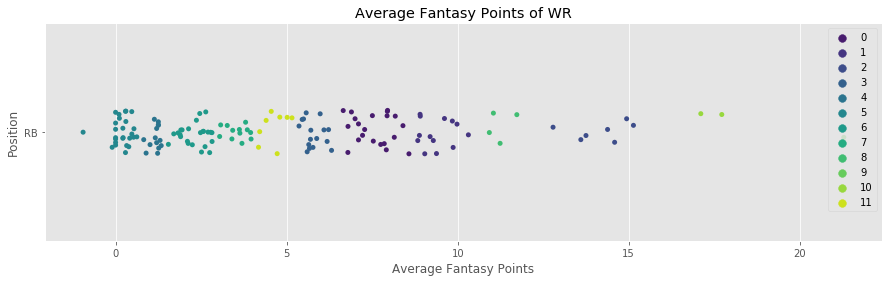

In [32]:
agg = AgglomerativeClustering(n_clusters=12, linkage='ward')
labels = agg.fit_predict(X)

plt.figure(figsize=(15,4));
plt.title('Average Fantasy Points of WR');
sns.stripplot(x="avg_points", y="pos", data=df, hue=labels, palette='viridis', jitter=True);
plt.xlabel('Average Fantasy Points');
plt.ylabel('Position');

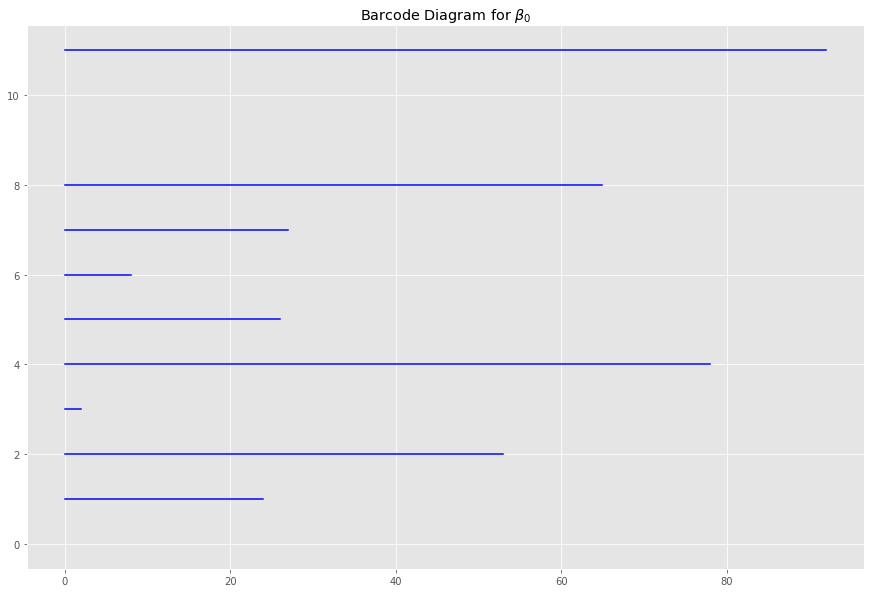

In [33]:
stats = df.iloc[:,4:].values

scaler = MinMaxScaler()
scaled_stats = scaler.fit_transform(stats)

cmapper = ClutchMapper()
cmapper.fit(scaled_stats, labels)

f = cmapper.build_filtration()

ph = d.homology_persistence(f)
dgms = d.init_diagrams(ph, f)

plt.figure(figsize=(15,10));
plt.title('Barcode Diagram for $\\beta_0$');
d.plot.plot_bars(dgms[0], show = True)

In [43]:
rb_complex = cmapper.build_complex(85)

fig = visualize_complex(rb_complex, 'RB Complex')
iplot(fig, filename='rb_complex')

In [38]:
df['label'] = labels
col_list = ['name']

for col in df.columns[3:]:
    if df[col].max() > 0:
        col_list.append(col)

In [39]:
df.loc[df['label'] == 9, col_list]

,name,avg_points,avg_passing_attempts,avg_passing_completions,avg_incomplete_passes,avg_passing_yards,avg_passing_touchdowns,avg_interceptions_thrown,avg_rushing_attempts,avg_rushing_yards,avg_rushing_touchdowns,avg_receptions,avg_receiving_yards,avg_receiving_touchdowns,avg_kickoff_and_punt_return_yards,avg_kickoff_and_punt_return_touchdowns,avg_fumbles_lost,avg_fumble,avg_2_point_conversions,avg_tackle,avg_assisted_tackles,avg_forced_fumble,avg_fumbles_recovery,avg_touchdown_blocked_kick,avg_blocked_kick_punt_fg_pat,avg_safety,avg_fumble_return_yards,label
0,Todd Gurley,21.286667,0.0,0.0,0.0,0.0,0.0,0.0,18.6,87.0,0.866667,4.266667,52.533333,0.4,0.0,0.0,0.133333,0.333333,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,9


In [40]:
df.loc[df['label'] == 4, col_list]

,name,avg_points,avg_passing_attempts,avg_passing_completions,avg_incomplete_passes,avg_passing_yards,avg_passing_touchdowns,avg_interceptions_thrown,avg_rushing_attempts,avg_rushing_yards,avg_rushing_touchdowns,avg_receptions,avg_receiving_yards,avg_receiving_touchdowns,avg_kickoff_and_punt_return_yards,avg_kickoff_and_punt_return_touchdowns,avg_fumbles_lost,avg_fumble,avg_2_point_conversions,avg_tackle,avg_assisted_tackles,avg_forced_fumble,avg_fumbles_recovery,avg_touchdown_blocked_kick,avg_blocked_kick_punt_fg_pat,avg_safety,avg_fumble_return_yards,label
108,Mack Brown,1.333333,0.0,0.0,0.0,0.0,0.0,0.0,2.666667,9.666667,0.000000,0.333333,3.666667,0.000,5.666667,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,4
109,Tre Madden,1.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.400000,13.000000,0.000,0.000000,0.0,0.0,0.0,0.0,0.600000,0.600000,0.000,0.000000,0.0,0.0,0.0,0.0,4
110,Roosevelt Nix,1.260000,0.0,0.0,0.0,0.0,0.0,0.0,0.300000,0.000000,0.100000,0.200000,0.600000,0.100,0.000000,0.0,0.0,0.0,0.0,0.700000,0.400000,0.000,0.000000,0.0,0.0,0.0,0.0,4
111,Fozzy Whittaker,1.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.700000,1.800000,0.000000,0.500000,4.700000,0.100,11.000000,0.0,0.0,0.0,0.0,0.200000,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,4
112,Tyler Ervin,1.250000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,3.000000,0.000000,2.000000,9.500000,0.000,38.250000,0.0,0.0,0.0,0.0,0.250000,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,4
113,Andre Williams,1.250000,0.0,0.0,0.0,0.0,0.0,0.0,4.500000,12.500000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.500000,0.000,0.000000,0.0,0.0,0.0,0.0,4
114,Zach Zenner,1.228571,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,3.714286,0.142857,0.000000,0.000000,0.000,8.857143,0.0,0.0,0.0,0.0,0.571429,0.000000,0.000,0.142857,0.0,0.0,0.0,0.0,4
115,James Conner,1.200000,0.0,0.0,0.0,0.0,0.0,0.0,2.666667,12.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,4
116,Zach Line,1.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.875000,3.500000,0.000000,0.250000,1.000000,0.125,0.000000,0.0,0.0,0.0,0.0,0.250000,0.000000,0.125,0.000000,0.0,0.0,0.0,0.0,4
117,Dwayne Washington,1.160000,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,8.800000,0.000000,0.400000,2.800000,0.000,6.200000,0.0,0.0,0.0,0.0,0.600000,0.200000,0.000,0.000000,0.0,0.0,0.0,0.0,4


In [41]:
df.loc[df['label'] == 11, col_list]

,name,avg_points,avg_passing_attempts,avg_passing_completions,avg_incomplete_passes,avg_passing_yards,avg_passing_touchdowns,avg_interceptions_thrown,avg_rushing_attempts,avg_rushing_yards,avg_rushing_touchdowns,avg_receptions,avg_receiving_yards,avg_receiving_touchdowns,avg_kickoff_and_punt_return_yards,avg_kickoff_and_punt_return_touchdowns,avg_fumbles_lost,avg_fumble,avg_2_point_conversions,avg_tackle,avg_assisted_tackles,avg_forced_fumble,avg_fumbles_recovery,avg_touchdown_blocked_kick,avg_blocked_kick_punt_fg_pat,avg_safety,avg_fumble_return_yards,label
64,Matt Breida,5.156250,0.0,0.0,0.0,0.0,0.0,0.0,6.562500,29.062500,0.125000,1.312500,11.250000,0.062500,5.187500,0.0,0.000000,0.062500,0.0,0.000000,0.000000,0.000000,0.062500,0.0,0.0,0.0,0.0,11
65,Alfred Morris,5.015385,0.0,0.0,0.0,0.0,0.0,0.0,8.846154,42.076923,0.076923,0.538462,3.461538,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,11
66,Marcus Murphy,4.800000,0.0,0.0,0.0,0.0,0.0,0.0,7.000000,41.000000,0.000000,2.000000,7.000000,0.000000,18.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,11
67,Devontae Booker,4.723077,0.0,0.0,0.0,0.0,0.0,0.0,6.076923,23.000000,0.076923,2.307692,21.153846,0.000000,21.230769,0.0,0.076923,0.153846,0.0,0.153846,0.000000,0.000000,0.076923,0.0,0.0,0.0,0.0,11
68,Chris Ivory,4.550000,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,27.285714,0.071429,1.500000,12.500000,0.071429,0.000000,0.0,0.142857,0.142857,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,11
69,Andre Ellington,4.400000,0.0,0.0,0.0,0.0,0.0,0.0,1.818182,5.000000,0.090909,3.545455,33.545455,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.090909,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,11
70,Wendell Smallwood,4.212500,0.0,0.0,0.0,0.0,0.0,0.0,5.875000,21.750000,0.125000,1.625000,12.875000,0.000000,11.625000,0.0,0.000000,0.000000,0.0,0.250000,0.000000,0.125000,0.000000,0.0,0.0,0.0,0.0,11
71,Alfred Blue,4.177778,0.0,0.0,0.0,0.0,0.0,0.0,7.888889,29.111111,0.111111,0.777778,6.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.444444,0.111111,0.111111,0.000000,0.0,0.0,0.0,0.0,11


In [42]:
df.loc[df['label'] == 10, col_list]

,name,avg_points,avg_passing_attempts,avg_passing_completions,avg_incomplete_passes,avg_passing_yards,avg_passing_touchdowns,avg_interceptions_thrown,avg_rushing_attempts,avg_rushing_yards,avg_rushing_touchdowns,avg_receptions,avg_receiving_yards,avg_receiving_touchdowns,avg_kickoff_and_punt_return_yards,avg_kickoff_and_punt_return_touchdowns,avg_fumbles_lost,avg_fumble,avg_2_point_conversions,avg_tackle,avg_assisted_tackles,avg_forced_fumble,avg_fumbles_recovery,avg_touchdown_blocked_kick,avg_blocked_kick_punt_fg_pat,avg_safety,avg_fumble_return_yards,label
1,Ezekiel Elliott,17.720000,0.0,0.0,0.0,0.0,0.0,0.0,24.2,98.300000,0.7,2.600000,26.900000,0.200000,0.0,0.0,0.100000,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
2,Le'Veon Bell,17.106667,0.0,0.0,0.0,0.0,0.0,0.0,21.4,86.066667,0.6,5.666667,43.666667,0.133333,0.0,0.0,0.133333,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
